In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('../input/usa-cers-dataset/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
df.drop(['Unnamed: 0','vin'],axis=1,inplace=True)
df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,usa,22 hours left


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32626bc9d0>,
      dtype=object)

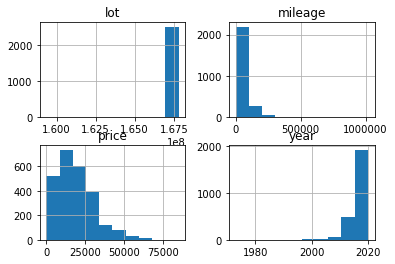

In [5]:
df.hist()

# #Plotting a correlation, between No. of cars, and Prices.**

Text(0, 0.5, 'No. of cars')

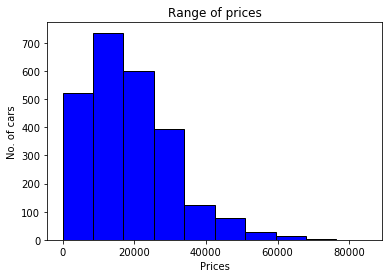

In [6]:
plt.hist(df['price'], color = 'blue', edgecolor = 'black',bins=10)

# Add labels
plt.title('Range of prices')
plt.xlabel('Prices')
plt.ylabel('No. of cars')

(We see that most of the cars, are having the price range of $10k to $20k)

# Now considering, how many cars originate from which country,considering our dataset.

(array([2492.,    0.,    0.,    0.,    0.,    7.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]),
 <a list of 6 Patch objects>)

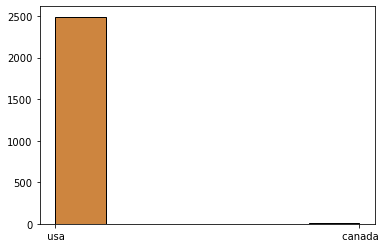

In [7]:
plt.hist(df['country'], color = 'peru', edgecolor = 'black',bins=6)

(96-97% of cars are from Usa, while only 3-4% are from canada)

# Now,Lets consider the relation between the prices and the mileage given by the cars,using scatterplot.

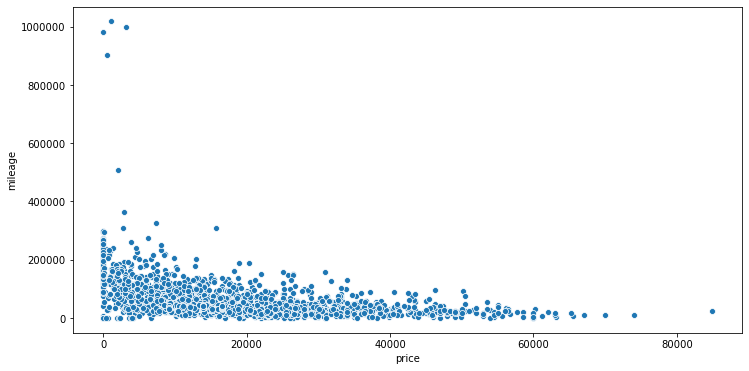

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['price'], y=df['mileage']);

# The same relation,with just different representation,using Jointplots.

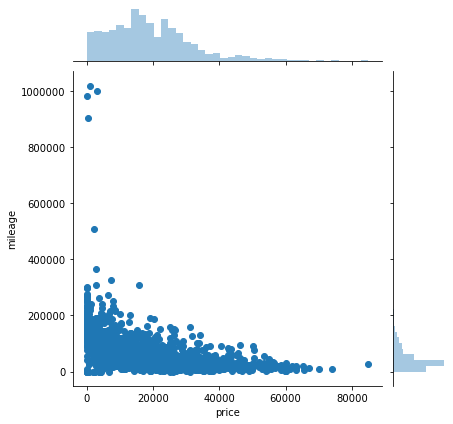

In [9]:
sns.jointplot(x=df['price'], y=df['mileage']);

# Now, Lets see, Price range of various Models of cars,from the given dataset, using Seaborn Boxplot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

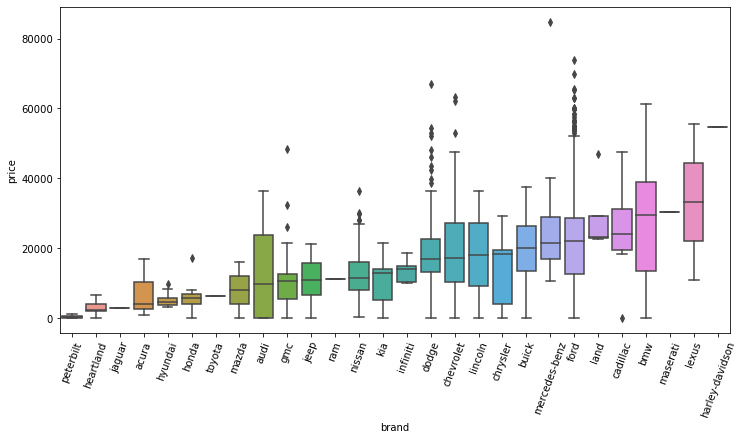

In [10]:
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=70)


# Considering, How many cars,come from which state of USA, as well as Canada, we'll just take Top-30 states,for better presentation.

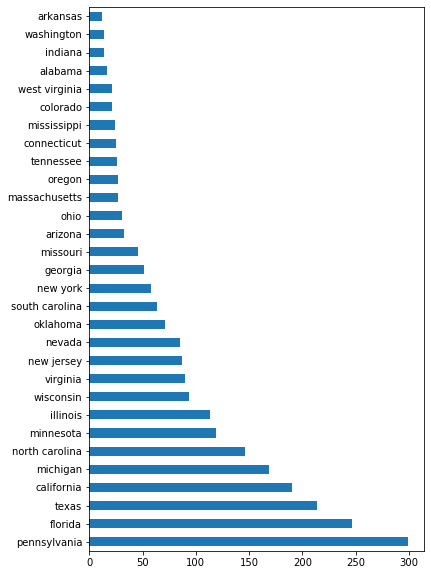

In [11]:
df['state'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

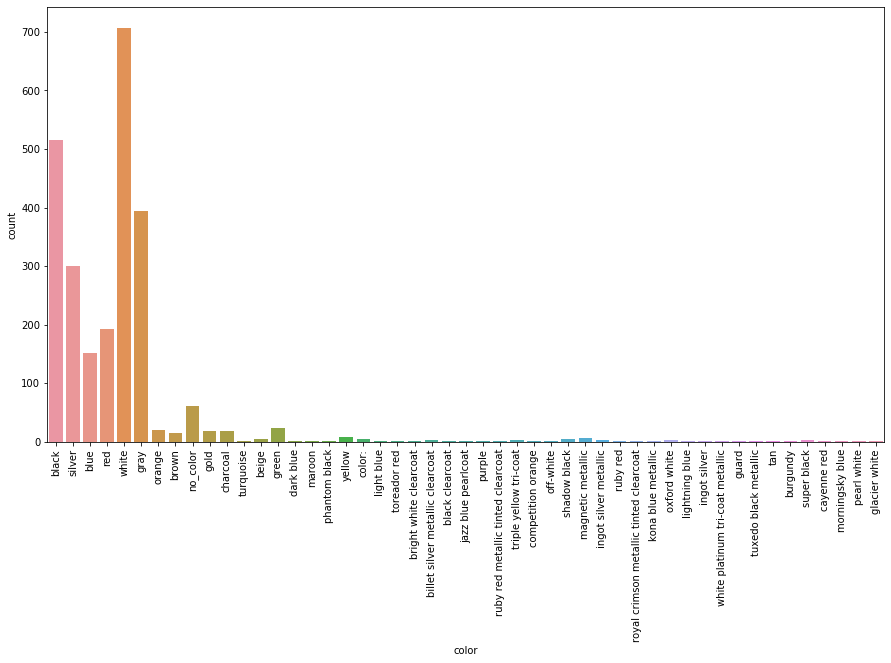

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(df['color']);
plt.xticks(rotation=90)

# And Lastly, we'll plot the correalation Heatmap of each and every features,using Seaborn.

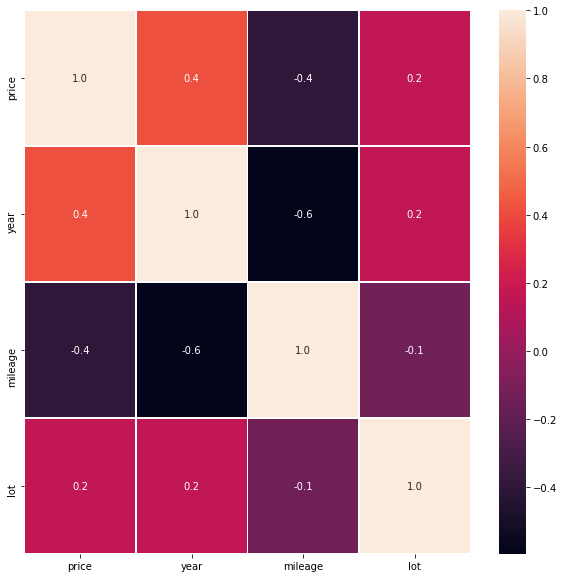

In [13]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# If you, like the work, do upvote,also comment your views,
# There can be many relations,which can be shown/plotted within the features using    Matplotlib and seaborn(which I have used), but I have just sticked to basic one's.
# # Thank-You!